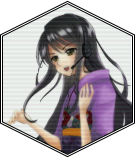

In [61]:
from IPython.display import Image, display
Image("ryoko.png", width="70")

# The Final Stage

*Dr. Ryoko is stuck in the quantum multiverse due to noise clusters interfering with her device. <br/>
Please DM Dr. Ryoko and ask her about the **noise clusters** and you will find out more. <br/>
Dr. Ryoko is trying to clear noise clusters with her laser beams, but has only 3 shots left.<br/>
To make matters worse, there seems to be one area (board) that cannot be cleared within 3 shots. <br/>
Help Dr. Ryoko identify that one area (board) with noise clusters that **cannot be cleared within 3 shots**. Good luck!<br/>*

[<< Click here to communicate with Dr. Ryoko through the web cam >>](https://youtu.be/Bkk5-j6rpoM)

*You can do this by learning how to solve a famous classic puzzle called “Asteroids puzzle”.*

# Week3: False Asteroids
Asteroids is a famous puzzle with the following setup and rules:
- The asteroids are placed on a grid.
- The objective is to destroy all the asteroids by shooting laser beams: either vertically or horizontally.
- Determine how to destroy all the asteroids by shooting no more than the specified number of beams.

The following image is an example of an Asteroids puzzle. In this example, the board size is 4 × 4 and we have six asteroids.

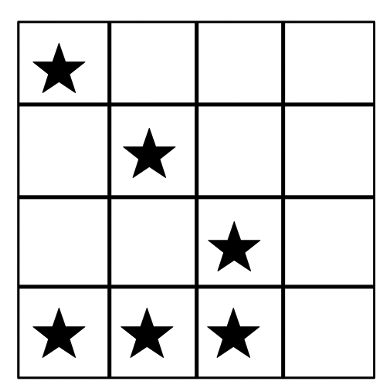

In [6]:
Image('asteroids_example.png')

As shown below, we can destroy all the asteroids by shooting 3 lasers vertically. Each thick blue line represents a laser beam. 

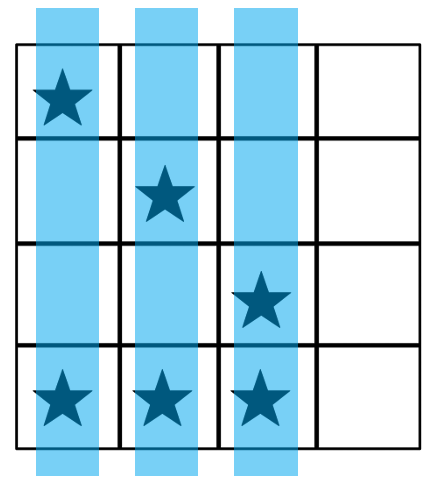

In [4]:
Image('asteroids_beam_example.png')

There are also false Asteroid problems. An Asteroid problem is false if the asteroids cannot be cleared within the specified number of beams. The following example is a false Asteroid problem with 3 laser beams.

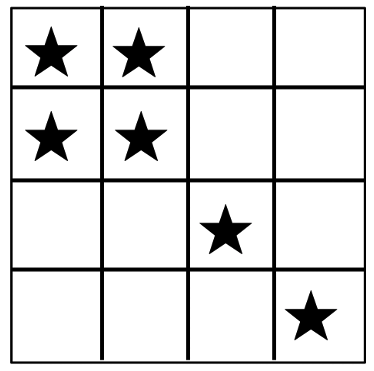

In [5]:
Image('false_asteroids_example.png')

----------
# Final Exercise
There are 16 areas (boards) that Dr. Ryoko needs to clear, each of which has 6 noise clusters that correspond to an asteroid in "Asteroids puzzle". However, there happens to be one area that cannot be cleared within three laser shots! Use Grover's algorithm you learned in Weeks 1 & 2 to find that one area (board)!

A board with asteroids is represented with a list of tuples. Each tuple represents the coordinate of an asteroid in the format `[row index, column index]`. Therefore, a board according to the following image can be represented as:

```
[['0', '0'], ['1', '1'], ['2', '2'], ['3', '0'], ['3', '1'], ['3', '2']]
```


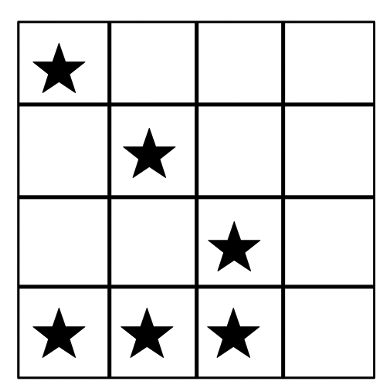

In [7]:
Image('asteroids_example.png')

There are 16 areas (boards) with the following configurations.
Find the area that cannot be cleared with 3 laser shots by using Grover's algorithm to help Dr. Ryoko!

Answer by creating a quantum circuit to solve the puzzle shown with the problem set above. In the quantum circuit to be submitted, measure **only the `solution` (4bit)** that solves the puzzle. <br/>
To submit your solution, create a function that takes `problem_set` as an input and then returns a  `QuantumCircuit`.  You can name the function as you like. Make sure it works even with another dataset of "problem_set". We will validate your circuit with different inputs.<br/>
Make a circuit that gets the correct answer at a low cost. The lower the cost, the better.

## <span style="color: red; ">IMPORTANT: Final exercise submission rules</span>

**For solving this problem:**<br/>
- **Please implement the quantum circuit within <span style="color: red; ">28 qubits.</span>**<br/>
- Use **Grover's algorithm** you learned in Week1 & 2 with **<span style="color: red; ">iteration ＝ 1.</span>**
- The initial state for Grover's algorithm must be equal probability distributions. For example, if you want use only 3 computational bases for 2 qubits instead of 4 as the initial state. Then, the state will be $\sqrt\frac{1}{3} (|00\rangle + |01\rangle + |11\rangle)$

- Please note that you can get the answer with the same endian as the one used in Week2 explanation. You should map the index of the problem into four classical registers *`c[0:4]`* in binary. `c[0]` is the highest bit and `c[3]` is the lowest bit. For example, when mapping 12, the furthest left bit of the `1100` will be mapped to `c[0]`.
- Make sure you **create an oracle** that **doesn't require any knowledge of what the answers are**. (For example, you are not allowed to create an oracle by using a classical optimization solver to get your answers for it.)  
- With the exception of the Unroller, which is required for decomposing your circuit to calculate quantum costs, you are not allowed to use any existing transpiler passes nor original transpilers for making simplifications in this competition.
- Please **do not run jobs in succession** even if you are concerned that your job is not running properly. This can create a long queue and clog the backend. You can check whether your job is running properly at:<br/>
https://quantum-computing.ibm.com/results  
- Your score for this exercise will be same as the cost of your QuantumCircuit. The lower the cost, the better.
- Judges will check top 10 solutions manually to see if their solutions adhere to the rules. **Please note that your ranking is subject to change after the challenge period as a result of the judging process.**
- Top 10 participants will be recognized and asked to submit a write up on how they solved the exercise.

# Solution
So, taking the N-queens problem as an inspiration, this is definitely related to the possible permutations that can be applied to the board.
A board $A$ is NOT solvable within 3 shots if, by any permutation $P$ of rows, it can be written in the shape:

$PB = 1 + C$

Where:
 * As the [permutation matrices](https://en.wikipedia.org/wiki/Permutation_matrix#Matrix_group) form a group, $P$ represents any possible permutation (i.e. any combination of successive permutations)
 * 1 is the identity matrix
 * C is a matrix with all the elements of its diagonal equal to 0 and, as there are only 6 asteroids in the board, it only has two 1s
 
Note: this is because having asteroids in its main diagonal would require at least 4 shots (1 per asteroid/row/column)

Now, there are two cases:
1. $B$ doesn't have already the shape $1+C$. In this case, the condition for $P$ to exist given the equation above is that $B$ can be inverted so that we can solve for $P$. $B$ can be inverted if and only if its determinant is not zero, so that's the condition the circuit is going to check.
2. $B$ already has the shape $1+C$. In this case, there are two possibilities (given without mathematical rigor and obtained heuristically):

 2.1 If $C$ is symmetric, $P$ is the identity (see example below to convince yourself the only permutation possible maps the matrix back to itself) and the determinant is zero, so we need to explicitly check whether the matrix is in the desired shape or not:
   $$det\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 1 \\ 0 & 0&1&0 \\ 0&1&0&1 \end{pmatrix} = 0$$
 2.2 If $C$ is anti-symmetric, then the determinant is not zero and it falls under case 1:
   $$det\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 1 & 0 \\ 0 & 0&1&0 \\ 0&1&0&1 \end{pmatrix} = 1$$

In the code below, all cases are handled by the oracle `determinant()`.

Like in exercise 1b, for 4 qubits theta is:

$\theta = \sin^-1 (\frac{1}{\sqrt{2^4}}) = 0.2526802551$

So, the amount of ideal iterations we need is:

$t = \frac{ \frac{\pi/2}{\theta} - 1 }{2} = 2.6$

In [134]:
#Helpers

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import CXGate
from numpy import pi

def hx(self, q):
    """
    Creates a simple gate synthesis by matrix multiplication:
    HX = (pi/2,0,2pi)
    """
    self.u3(pi/2, 0, 2*pi, q)

def xh(self, q):
    """
    Creates a simple gate synthesis by matrix multiplication:
    XH = (pi/2,pi,pi)
    """
    self.u3(pi/2, pi, pi, q)
    
def xhx(self, q):
    """
    Creates a simple gate synthesis by matrix multiplication:
    XHX = (pi/2,-pi,pi)
    """
    self.u3(pi/2, -pi,pi, q)
    
def hxh(self, q):
    """
    Creates a simple gate synthesis by matrix multiplication:
    XHX = (0,pi/2,pi/2)
    """
    self.u3(0,pi/2,pi/2, q)
    
QuantumCircuit.hx = hx
QuantumCircuit.xh = xh
QuantumCircuit.xhx = xhx
QuantumCircuit.hxh = hxh
    
def diffuser(qbits, ancilla_amount=2):
    """
    Creates a gate that performs a diffusion algorithm to the given qubits.
    The input is expected as: 9 qubits to diffuse, ancilla_amount qubits.

    Args
    --------------------
    qbits: the amount of qbits to diffuse
    ancilla_amount: the amount of ancilla qubits to use by the MCT with mode=basic
    """
    qc = QuantumCircuit(qbits + ancilla_amount, name="diffuser")
    qlist = [i for i in range(0,qbits)]
    ancilla = [i for i in range(qbits, qbits+ancilla_amount)]
    # # Apply transformation |s> -> |00..0> (H-gates)
    # qc.h(qlist)
    # # Apply transformation |00..0> -> |11..1> (X-gates)
    # qc.x(qlist)
    qc.hx(qlist[:-1])
    qc.hxh(qlist[-1])
    # Do multi-controlled-Z gate
    # qc.h(qlist[-1])
    qc.mct(qlist[:-1], qlist[-1], ancilla, mode="basic")
    # qc.h(qlist[-1])
    # Apply transformation |11..1> -> |00..0>
    # qc.x(qlist)
    # Apply transformation |00..0> -> |s>
    # qc.h(qlist)
    qc.hxh(qlist[-1])
    qc.xh(qlist[:-1])
    qc.to_gate()
    return qc

In [135]:
def qram(problem_set, apply_x=False):
    def set_board(qc, address, board, ancilla, problem):
        qc.mcmt(CXGate(), address, [board[int(x)*4 + int(y)] for x,y in problem], ancilla_qubits=ancilla, mode="basic")
    # 4 address, 16 board
    address = QuantumRegister(4,name="address")
    board = QuantumRegister(16,name="board")
    ancilla = QuantumRegister(3,name="ancilla")
    qc = QuantumCircuit(address, board, ancilla, name="qRAM")
    # init
    # qc.h(address)
    # address 0 - 0000
    if apply_x:
        qc.x([address[0],address[1],address[2],address[3]])
    set_board(qc,address,board,ancilla,problem_set[0])
    # address 1 - 0001
    qc.x([address[3]])
    set_board(qc,address,board,ancilla,problem_set[1])
    # address 3 - 0011
    qc.x([address[2]])
    set_board(qc,address,board,ancilla,problem_set[3])
    # address 2 - 0010
    qc.x([address[3]])
    set_board(qc,address,board,ancilla,problem_set[2])
    # address 6 - 0110
    qc.x([address[1]])
    set_board(qc,address,board,ancilla,problem_set[6])
    # address 7 - 0111
    qc.x(address[3])
    set_board(qc,address,board,ancilla,problem_set[7])
    # address 5 - 0101
    qc.x([address[2]])
    set_board(qc,address,board,ancilla,problem_set[5])
    # address 4 - 0100
    qc.x([address[3]])
    set_board(qc,address,board,ancilla,problem_set[4])
    # address 12 - 1100
    qc.x([address[0]])
    set_board(qc,address,board,ancilla,problem_set[12])
    # address 13 - 1101
    qc.x(address[3])
    set_board(qc,address,board,ancilla,problem_set[13])
    # address 15 - 1111
    qc.x(address[2])
    set_board(qc,address,board,ancilla,problem_set[15])
    # address 14 - 1110
    qc.x(address[3])
    set_board(qc,address,board,ancilla,problem_set[14])
    # address 10 - 1010
    qc.x([address[1]])
    set_board(qc,address,board,ancilla,problem_set[10])
    # address 11 - 1011
    qc.x(address[3])
    set_board(qc,address,board,ancilla,problem_set[11])
    # address 9 - 1001
    qc.x([address[2]])
    set_board(qc,address,board,ancilla,problem_set[9])
    # address 8 - 1000
    qc.x([address[3]])
    set_board(qc,address,board,ancilla,problem_set[8])
    # uncompute
    qc.x([ address[1], address[2], address[3] ])
    return qc

def determinant():
    board = QuantumRegister(16,name="board")
    val = QuantumRegister(1,name="det")
    ancilla = QuantumRegister(4,name="ancilla")
    qc = QuantumCircuit(board,val, ancilla, name="Det")
    terms = [(+1, [0,5,10,15]), (-1, [0,5,11,14] ), (-1, [0,6,9,15]), (+1, [0,6,11,13]), (+1, [0,7,9,14] ), (-1, [0,7,10,13] ), (-1, [1,4,10,15]), (+1, [1,4,11,14]), (+1, [1,6,8,15] ), (-1, [1,6,11,12] ), (-1, [1,7,8,14]), (+1, [1,7,10,12]), (+1, [2,4,9,15] ), (-1, [2,4,11,13] ), (-1, [2,5,8,15]), (+1, [2,5,11,12]), (+1, [2,7,8,13] ), (-1, [2,7,9,12] ), (-1, [3,4,9,14]), (+1, [3,4,10,13]), (+1, [3,5,8,14] ), (-1, [3,5,10,12] ), (-1, [3,6,8,13]), (+1, [3,6,9,12])]
    # append edge cases when the input is 1+C where C is symmetric
    terms += [ (+1,[0,5,10,15,1,4]), (+1,[0,5,10,15,2,8]), (+1,[0,5,10,15,3,12]), (+1,[0,5,10,15,6,9]), (+1,[0,5,10,15,7,13]), (+1,[0,5,10,15,11,14])]
    for sign,term in terms:
        # Compute term and store it in val. Note that as there are only 6 ones, it is not possible to have
        # +2 or -2 ever in the determinant, so one bit is sufficient because det=+1 or det=-1 (which in
        # any case is different from 0 and that's all that matters, so it can be represented with an
        # on/off bit).
        qc.mct(term[:], val, ancilla, mode="basic")
    return qc

In [138]:
def week3_ans_func(problem_set, reverse=False):
    address = QuantumRegister(4, name='address')
    board = QuantumRegister(16, name='tile')
    ancilla = QuantumRegister(4, name='ancilla')
    det = QuantumRegister(1, name='oracle')
    bits = ClassicalRegister(4,name='bits')
    qc = QuantumCircuit(address, board,det,ancilla, bits)
    
    """ QRAM """
    # As H is performed to entangle and then X (inside qRAM) to get address 0000, they can be combined
    # in a single U3 as in diffuser():
    qc.hx(address)
    qc.append(qram(problem_set, apply_x=False), address[:]+board[:]+ancilla[:3])
        
    """ ORACLE """
    # The value of the determinant will be the oracle as it is gonna be !=0 only for the target board
    # in condition 1 and condition 2.2. For condition 2.1, as there are only 6 symmetric cases, we can
    # consider them manually and "include" them in the determinant computation.
    qc.xh(det)
    qc.append(determinant(), board[:] + det[:] + ancilla[:4])
    
    """ UNDO QRAM """
    qc.append(qram(problem_set, apply_x=True).inverse(), address[:]+board[:]+ancilla[:3])
    
    """ DIFFUSE """
    qc.append(diffuser(4, ancilla_amount=2), address[:] + ancilla[:2])
    
    # measure the address
    qc.measure(address[:], bits)
    
    # reverse
    qc = qc.reverse_bits() if reverse else qc
    return qc

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The multi-control multi-target gate has moved to the circuit library as of 0.14.0 and will not be useable as circuit method anymore. This method will be removed no earlier than 3 months after the release date. You should create the qiskit.circuit.library.MCMT or MCMTVChain circuits and add then to your circuit using append, extend, or compose.
  This is separate from the ipykernel package so we can avoid doing imports until


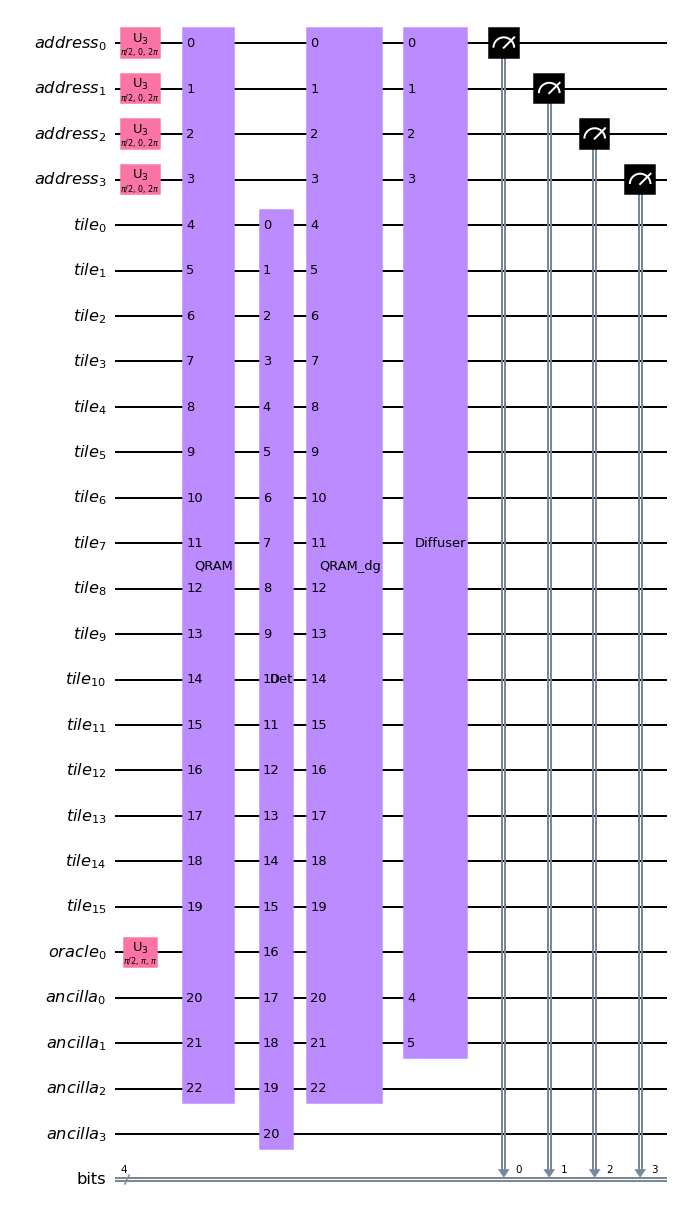

In [143]:
problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']], 
#      [['0', '0'], ['1', '1'], ['1', '2'], ['2', '2'], ['3', '1'], ['3', '3']], # 1+C antisym
#     [['0', '0'], ['1', '1'], ['1', '3'], ['2', '2'], ['3', '1'], ['3', '3']], # 1+C sym
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']], # default wrong (no 1+C)
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

qc = week3_ans_func(problem_set)
qc.draw()

In [144]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
provider = IBMQ.load_account()

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
print(job.result().get_counts())

ibmqfactory.load_account:WARNING:2020-11-28 04:23:03,472: Credentials are already in use. The existing account in the session will be replaced.


{'0000': 36, '0001': 30, '0010': 29, '0011': 44, '0100': 42, '0101': 454, '0110': 29, '0111': 39, '1000': 28, '1001': 39, '1010': 41, '1011': 45, '1100': 47, '1101': 23, '1110': 37, '1111': 37}


In [145]:
# Submission code
from qc_grader import grade_ex3, prepare_ex3, submit_ex3

# Execute your circuit with following prepare_ex3() function.
# The prepare_ex3() function works like the execute() function with only QuantumCircuit as an argument.
job = prepare_ex3(week3_ans_func)

# The bit string with the highest number of observations is treated as the solution.
counts = job.result().get_counts()
counts

Running week3_ans_func...
Computing cost...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The multi-control multi-target gate has moved to the circuit library as of 0.14.0 and will not be useable as circuit method anymore. This method will be removed no earlier than 3 months after the release date. You should create the qiskit.circuit.library.MCMT or MCMTVChain circuits and add then to your circuit using append, extend, or compose.
  This is separate from the ipykernel package so we can avoid doing imports until


Starting experiments. Please wait...
You may monitor the job (id: 5fc1d0c11dde84001b4c7851) status and proceed to grading when it successfully completes.


[{'0000': 31,
  '0001': 36,
  '0010': 31,
  '0011': 34,
  '0100': 39,
  '0101': 479,
  '0110': 34,
  '0111': 30,
  '1000': 36,
  '1001': 27,
  '1010': 44,
  '1011': 40,
  '1100': 42,
  '1101': 25,
  '1110': 32,
  '1111': 40},
 {'0000': 37,
  '0001': 36,
  '0010': 42,
  '0011': 34,
  '0100': 35,
  '0101': 36,
  '0110': 43,
  '0111': 36,
  '1000': 37,
  '1001': 37,
  '1010': 34,
  '1011': 33,
  '1100': 461,
  '1101': 33,
  '1110': 29,
  '1111': 37}]

In [146]:
# Check your answer by executing following code.
# The quantum cost of the QuantumCircuit is obtained as the score. The lower the cost, the better.
grade_ex3(job)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 22204.
The lower your score the better!
Feel free to submit your answer.


In [147]:
# Submit your results by executing following code. You can submit as many times as you like during the period. 
submit_ex3(job)

Submitting your answer. Please wait...

Success 🎉! Your answer has been submitted.
Congratulations! You have rescued Dr. Ryoko from the quantum realm. The bright "quantum future" is ahead.
